# 2 経済成長

労働生産性の成長率を、技術進歩(TFP)と資本深化(capital deepening)に分解する成長会計を実行するプログラムを書いて提出してください(ipynbでPythonを推奨)。

対象国は”France”, ”Germany”, ”Canada”, ”Italy”, ”Japan”, ”United Kingdom”, ”United States”。 

サンプル期間は1995年から2019年。

プログラムが最後まで走るかどうか、技術進歩(TFP)と資本深化(capital deepening)それぞれのレベルおよび寄与度について、Project2(growth accounting)にあるTable5.1のように結果を示しているかチェックします。

Country: CAN
      year  tfp_growth  cap_deepening_growth  gdp_growth  employment_growth
1995  1995         NaN                   NaN         NaN                NaN
1996  1996   -1.234663              2.641332    0.822711           0.849891
1997  1997    2.467775             -0.506842    2.092946           2.116120
1998  1998    1.906538             -3.404343    1.719773           2.377522
1999  1999    2.733648              3.111315    2.340758           2.595747
2000  2000    3.522515              2.133942    2.788281           2.271497
2001  2001   -0.347930             -0.440907    0.422561           1.260483
2002  2002    0.653386             -0.896060    0.185740           2.611279
2003  2003   -0.724673              3.345168   -0.616580           2.557671
2004  2004   -0.540805              2.143741    1.147628           1.968563
2005  2005    1.306164              3.094721    1.415431           1.723289
2006  2006   -0.496900             -1.422638    0.484812           2.126670

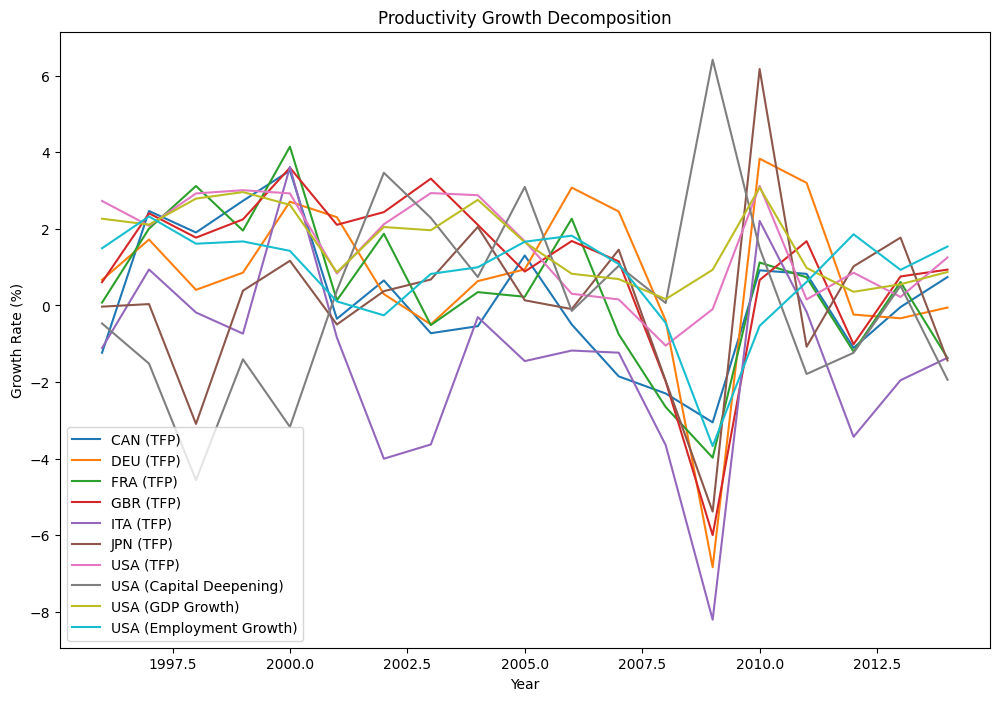

In [25]:
#3作目
import pandas as pd
import matplotlib.pyplot as plt

# 対象国とサンプル期間を設定
countries = ["France", "Germany", "Canada", "Italy", "Japan", "United Kingdom", "United States"]
start_year = 1995
end_year = 2019

# データをStata形式から読み込みます。
pwt90 = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt90.dta')

# 対象国のデータを抽出し、必要な列を選択します。
data = pwt90.loc[pwt90['country'].isin(countries)][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
# フィルタ条件として、指定されたサンプル期間のデータを選択します。欠損値を削除します。
data = data.loc[(data['year'] >= start_year) & (data['year'] <= end_year)].dropna()

# 追加変数の計算
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N

# データの整形
data = data.sort_values(['countrycode', 'year'])
grouped_data = data.groupby('countrycode')

# 技術進歩（TFP）の成長率を計算
data['tfp_growth'] = grouped_data['tfp_term'].pct_change() * 100

# 資本深化（capital deepening）の成長率を計算
data['cap_deepening_growth'] = grouped_data['cap_term'].pct_change() * 100

# 労働者1人当たりのGDP成長率を計算
data['gdp_growth'] = grouped_data['y_n'].pct_change() * 100

# 労働力投入の成長率を計算
data['employment_growth'] = grouped_data['emp'].pct_change() * 100

# 対象国ごとにデータを分割
grouped_data = data.groupby('countrycode')

# 対象国ごとの成長率データを表示
for country, group in grouped_data:
    print(f"Country: {country}")
    print(group[['year', 'tfp_growth', 'cap_deepening_growth', 'gdp_growth', 'employment_growth']])
    print("\n")

# データのプロット
plt.figure(figsize=(12, 8))

for country, group in grouped_data:
    plt.plot(group['year'], group['tfp_growth'], label=f"{country} (TFP)")

plt.plot(group['year'], group['cap_deepening_growth'], label=f"{country} (Capital Deepening)")
plt.plot(group['year'], group['gdp_growth'], label=f"{country} (GDP Growth)")
plt.plot(group['year'], group['employment_growth'], label=f"{country} (Employment Growth)")

plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Productivity Growth Decomposition")
plt.legend()
plt.show()



#### 🚨あとで削除🚨 GrowthAccounting.ipynb

このコードは、国別のデータから労働生産性の成長率を分析し、技術進歩（TFP）、資本深化（capital deepening）、労働力の増加（labor force accumulation）の要素を可視化するものです。


このコードは、'United Kingdom'のデータを用いて労働生産性の成長率を分析し、成長の要素を可視化しています。具体的には、'y_n_shifted'（GDP per workerの成長率）、'tfp_term_shifted'（技術進歩の成長率）、'cap_term_shifted'（資本深化の成長率）、'lab_term_shifted'（労働力の増加の成長率）の推移をグラフに表示しています。

<ipython-input-28-023b201876b5>:30: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(


   year countrycode        rgdpna       rkna        pop        emp  \
0  1975         GBR  9.756079e+05  4805111.5  56.179925  24.826508   
1  1976         GBR  1.005152e+06  4929271.5  56.212943  24.698595   
2  1977         GBR  1.031256e+06  5045754.5  56.224944  24.738674   
3  1978         GBR  1.073847e+06  5171337.0  56.223974  24.874187   
4  1979         GBR  1.113323e+06  5303411.0  56.220089  25.099518   
5  1980         GBR  1.089172e+06  5402248.5  56.221513  24.953400   
6  1981         GBR  1.079948e+06  5467771.5  56.231020  24.112947   
7  1982         GBR  1.102361e+06  5549436.0  56.250124  23.701401   
8  1983         GBR  1.148680e+06  5644459.0  56.283959  23.651485   
9  1984         GBR  1.174645e+06  5767542.0  56.337848  24.172579   

           avh     labsh    rtfpna     alpha           y_n         hours  \
0  1899.763371  0.603153  0.693385  0.396847  39297.023438  47164.489710   
1  1891.976205  0.603153  0.707695  0.396847  40696.730469  46729.154137   
2

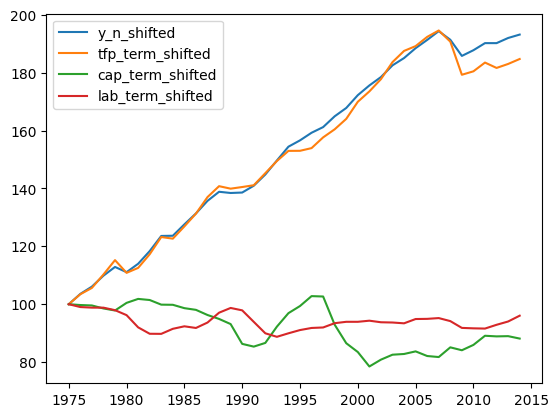

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# データをStata形式から読み込みます。
pwt90 = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt90.dta')

# データから'United Kingdom'のデータを選択し、必要な列（'year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna'）を抽出します。
data = pwt90.loc[pwt90['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
# フィルタ条件として、年度が1975年以上かつ2015年以下のデータを選択します。欠損値を削除します。
data = data.loc[(data['year'] >= 1975) & (data['year'] <= 2015)].dropna()

# 追加変数の計算

#'alpha'列を計算し、'labsh'から1を引いた値として設定します。
data['alpha'] = 1 - data['labsh']
#'y_n'列を計算し、'rgdpna'を'emp'で割った値として設定します（GDP per worker）
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
#'hours'列を計算し、'emp'と'avh'を掛けた値として設定します（労働時間）
data['hours'] = data['emp'] * data['avh']  # L
#'tfp_term'列を計算し、'rtfpna'を(1 / (1 - 'alpha'))のべき乗した値として設定します（技術進歩の項）
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
#'cap_term'列を計算し、('rkna' / 'rgdpna')を('alpha' / (1 - 'alpha'))のべき乗した値として設定します（資本深化の項）
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
#'lab_term'列を計算し、'hours'を'pop'で割った値として設定します（労働力の増加の項）
data['lab_term'] = data['hours'] / data['pop']  # L/N

#データの整形
#'year'列でデータをソートします。'countrycode'でグループ化し、各グループ内で以下の変数を計算します。
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],#'alpha'列を再計算し、1から'labsh'を引いた値として設定します。
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],#'y_n_shifted'列を計算し、100 * 'y_n'を最初の行の値で割った値として設定します（初期値を100とする成長率）
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],#'tfp_term_shifted'列を計算し、100 * 'tfp_term'を最初の行の値で割った値として設定します。
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],#'cap_term_shifted'列を計算し、100 * 'cap_term'を最初の行の値で割った値として設定します。
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0] #'lab_term_shifted'列を計算し、100 * 'lab_term'を最初の行の値で割った値として設定します。
)).reset_index(drop=True).dropna()

#データの表示
#dataの最初の10行を表示します
print(data.head(10))

# データのプロット
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')#'y_n_shifted'（GDP per workerの成長率）
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')#'tfp_term_shifted'（技術進歩の成長率）
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')#'cap_term_shifted'（資本深化の成長率）
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')#'lab_term_shifted'（労働力の増加の成長率）
plt.legend()
plt.show()

#### 🚨あとで削除🚨 growth_comp_2023.ipynb

このコードは、国別のデータから成長率とソロー残差を計算し、各国の成長率と資本シェアの平均を計算するものです。

In [29]:
import pandas as pd
import numpy as np


# Load data
pwt90 = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt90.dta')
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt90.loc[pwt90['country'].isin(["Australia", "Austria"])][['year', 'countrycode', 'rgdpna', 'rkna', 'emp', 'labsh']]
data = data.loc[(data['year'] >= 2000) & (data['year'] <= 2015)].dropna()

# Calculate additional columns
data['y_pc'] = np.log(data['rgdpna'] / data['emp'])  # GDP per worker
data['k_pc'] = np.log(data['rkna'] / data['emp'])  # Capital per worker
data['a'] = 1 - data['labsh']  # Capital share

# Order by year
data = data.sort_values('year')

# Group by isocode
grouped_data = data.groupby('countrycode')

# Calculate growth rates and Solow residual
data['g'] = (grouped_data['y_pc'].diff() * 100)  # Growth rate of GDP per capita

# Remove missing values
data = data.dropna()

# Calculate summary statistics
summary = data.groupby('countrycode').agg({'g': 'mean',
                                       'a': "mean"})

# Calculate additional summary statistics
summary['Growth Rate'] = summary['g']
summary['Capital Share'] = summary['a']

# Print output
print(summary)

                    g         a  Growth Rate  Capital Share
countrycode                                                
AUS          0.583894  0.429773     0.583894       0.429773
AUT          0.148971  0.421660     0.148971       0.421660
